In [7]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# open the file from data/train.csv with pandas
data = pd.read_csv('data/train.csv')

# print the first 5 rows of the dataframe
print(data.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [3]:
print('Count\n', data.count(), '\n')
print('Size\n', data.size, '\n')
print('Shape\n', data.shape, '\n')
print('Describe\n', data.describe())
print('Columns\n', data.columns, '\n')



Count
 PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64 

Size
 10692 

Shape
 (891, 12) 

Describe
        PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.3

In [4]:
data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'Fare', 'Embarked'], axis=1, inplace=True)
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,male,22.0,1,0
1,1,1,female,38.0,1,0
2,1,3,female,26.0,0,0
3,1,1,female,35.0,1,0
4,0,3,male,35.0,0,0


In [5]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch
count,891.000000,891.000000,714.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594
std,0.486592,0.836071,14.526497,1.102743,0.806057
min,0.000000,1.000000,0.420000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000
50%,0.000000,3.000000,28.000000,0.000000,0.000000
75%,1.000000,3.000000,38.000000,1.000000,0.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000


In [6]:
data = data.dropna(axisx=0)
print(data.shape)
data.describe()

TypeError: DataFrame.dropna() got an unexpected keyword argument 'axisx'

In [ ]:
for column in data.columns:
    print(column, data[column].value_counts(), '\n')

Survived Survived
0    424
1    290
Name: count, dtype: int64 

Pclass Pclass
3    355
1    186
2    173
Name: count, dtype: int64 

Sex Sex
male      453
female    261
Name: count, dtype: int64 

Age Age
24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: count, Length: 88, dtype: int64 



<Axes: xlabel='Pclass'>

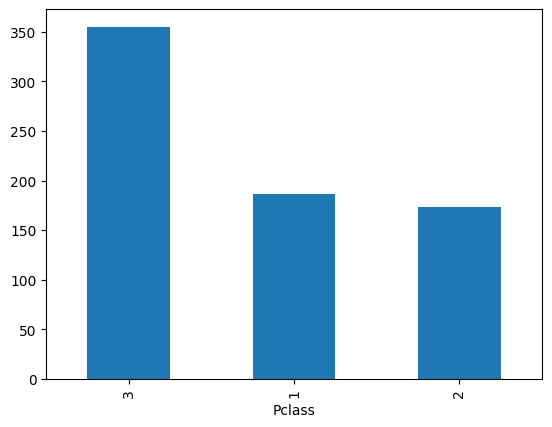

In [ ]:
data['Pclass'].value_counts().plot(kind='bar')

<Axes: >

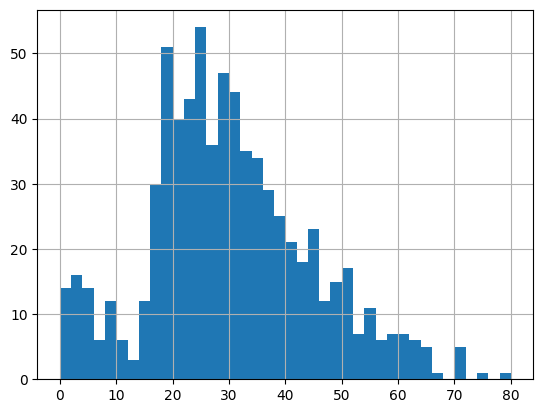

In [ ]:
data['Age'].hist( bins=40, range=(0,80), alpha=1)

<Axes: >

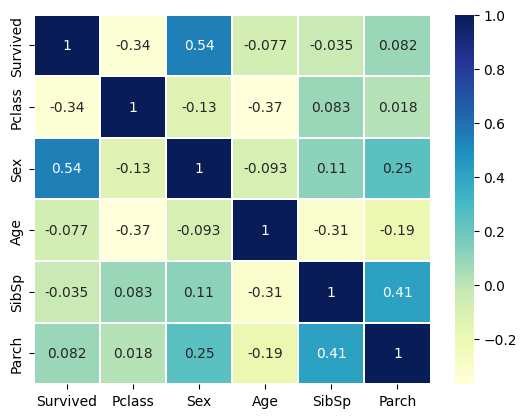

In [14]:
data.replace('male', 0, inplace=True)
data.replace('female', 1, inplace=True)

sns.heatmap(data.corr(), annot=True, cmap='YlGnBu', linewidths=0.2)

# Input PipeLine

In [28]:
from utils.age_imputer import AgeImputer


data = pd.read_csv('data/train.csv')

data.drop(['PassengerId', 'Name', 'Ticket', 'Fare', 'Cabin','Embarked'], axis=1, inplace=True)
#data.dropna(axis=0, inplace=True)

data.replace('male', 0, inplace=True)
data.replace('female', 1, inplace=True)



   Survived  Pclass  Sex   Age  SibSp  Parch
0         0       3    0  22.0      1      0
1         1       1    1  38.0      1      0
2         1       3    1  26.0      0      0
3         1       1    1  35.0      1      0
4         0       3    0  35.0      0      0


<Axes: >

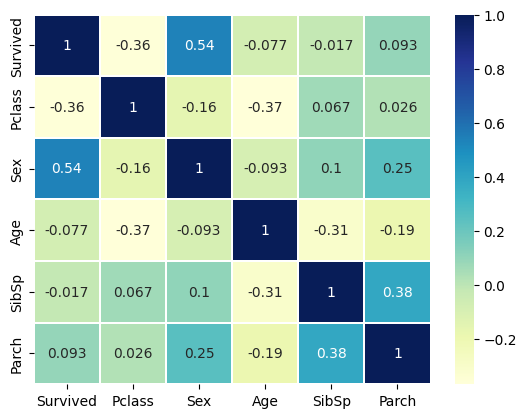

In [29]:
print(data.head())
sns.heatmap(data.corr(), annot=True, cmap='YlGnBu', linewidths=0.2)

In [35]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_indices, test_indices in split.split(data, data[['Survived', 'Pclass', 'Sex']]):
    train_data = data.iloc[train_indices]
    test_data = data.iloc[test_indices]


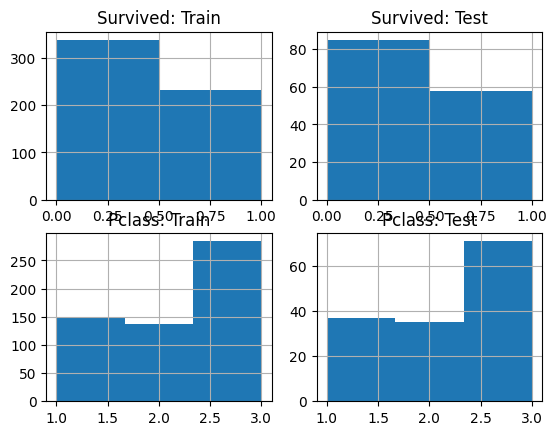

In [50]:
def plot_hist(nrow, ncol, index, serie, title, bins):
    plt.subplot(nrow, ncol, index)
    serie.hist(bins=bins)
    plt.title(title)

nrow = 2
ncol = 2

plot_hist(nrow, ncol, 1, train_data['Survived'], 'Survived: Train', 2)
plot_hist(nrow, ncol, 2, test_data['Survived'], 'Survived: Test', 2)
plot_hist(nrow, ncol, 3, train_data['Pclass'], 'Pclass: Train',  3)
plot_hist(nrow, ncol, 4, test_data['Pclass'], 'Pclass: Test', 3)


